# K-Means Clustering

### Import libraries

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA as sklearnPCA

### Load the dataset

In [222]:
df = pd.read_csv('./diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Class extraction

In [223]:
y = df['Outcome']
X = df[df.columns[:df.shape[1] - 1]]

### Variables / Helper functions declarations

In [224]:
K = 2
MAX_ITERS = 100

n_samples, n_features = X.shape
centroids = np.zeros((K, n_features))

def get_centroids(clusters):
    new_centroids = np.zeros((K, n_features))
    for cluster_idx, cluster in enumerate(clusters):
        if len(cluster) == 0:
            new_centroids[cluster_idx] = centroids[cluster_idx]
            continue

        for feature_idx in range(n_features):
            rows = X.iloc[cluster]
            feature_mean = np.mean(rows[X.columns[feature_idx]])
            new_centroids[cluster_idx][feature_idx] = feature_mean

    return new_centroids


def create_clusters(centroids):
    clusters = [[] for _ in range(K)]
    for idx, sample in X.iterrows():
        centroid_idx = closest_centroid(sample, centroids)
        clusters[centroid_idx].append(idx)

    return clusters


def closest_centroid(sample, centroids):
    distances = np.zeros((K, n_features))
    for feat_idx, feature in enumerate(sample):
        # distance for centroid of first cluster
        distances[0][feat_idx] = centroids[0][feat_idx] - feature

        # distance for centroid of second cluster
        distances[1][feat_idx] = centroids[1][feat_idx] - feature

    distance1 = abs(np.mean(distances[0]))
    distance2 = abs(np.mean(distances[1]))

    return 0 if distance1 <= distance2 else 1

def is_converged(old, curr):
    distances = [euclidean_distance(old[i], curr[i]) for i in range(K)]
    return sum(distances) == 0

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


### Initialize centroids

In [225]:
for col_idx, column in enumerate(X.columns):
    centroids[0][col_idx] = random.uniform(X[column].min(), X[column].max())
    centroids[1][col_idx] = random.uniform(X[column].min(), X[column].max())

centroids

array([[  7.82215433, 113.87615344,  47.00531149,  47.48821839,
        296.79994532,  57.69049958,   1.16846017,  52.27386552],
       [ 13.66625878, 134.96153721,  14.22064136,  13.4490231 ,
        689.47695864,  20.75270475,   2.23038277,  63.03167051]])

### Clustering

In [226]:
clusters = [[] for _ in range(K)]

for _ in range(MAX_ITERS):
    # update clusters
    clusters = create_clusters(centroids)

    # update cluster centroids
    old_centroids = centroids
    centroids = get_centroids(clusters)

    # check if clusters have changed
    if is_converged(old_centroids, centroids):
        break

### Label clusters

In [227]:
labels = np.empty(n_samples)
for cluster_idx, cluster in enumerate(clusters):
    for sample_idx in cluster:
        labels[sample_idx] = cluster_idx

### Plot clusters

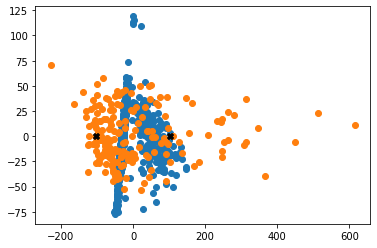

In [228]:
pca = sklearnPCA(n_components=2)

for i, indexes in enumerate(clusters):
    points = pca.fit_transform(X.iloc[indexes])
    x, y = points[:, 0], points[:, 1]
    plt.scatter(x, y, label=f"Cluster {i}")

c_points = pca.fit_transform(centroids)
c_x, c_y = c_points[:, 0], c_points[:, 1]
plt.scatter(c_x, c_y, marker='X', color='black')

plt.show()

### Statistics

In [229]:
TP = 0
FP = 0
TN = 0
FN = 0

for sample_idx, sample in X.iterrows():
    row = df.iloc[sample_idx]
    if sample_idx in clusters[1]:
        if row['Outcome'] == 1:
            TP += 1
        else:
            FP += 1
    else:
        if row['Outcome'] == 0:
            TN += 1
        else:
            FN += 1

total = TP + FP + TN + FN
correct = TP + TN
incorrect = FP + FN
print('----- Stats -----')
print(f'\tCorrect Predictions (Qty, Pct): ({correct}, {round((correct / total) * 100, 2)}%)')
print(f'\tIncorrect Predictions (Qty, Pct): ({incorrect}, {round((incorrect / total) * 100, 2)}%)')


----- Stats -----
	Correct Predictions (Qty, Pct): (519, 67.58%)
	Incorrect Predictions (Qty, Pct): (249, 32.42%)


### Conclusion

Before performing the clustering, we could see that when plotting the dataset there wasn't much of a difference when it came to the two possible classifications for each entry.

After the clustering, and analyzing the results, receiving a 67% of correct predictions is not as bad. We would need to add more information in order to improve the results of the classification.